In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import gzip
from Bio import SeqIO
import math
import random
import sys



The %autoreload block ensures that the module is reloaded automatically when running to take into account the backend modifications.

In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2
%aimport ChimFilter
sys.path.append('/home/robin/Elephants/Chimeras/')
import ChimFilter

### Load unfiltered, aligned LAA data:
We can test this approach on all individuals in the MHC dataset. At first glance, it seems some sequences are tractable, and others not. I'd imagine this is linked to how credible the sequences are in the first place... i.e. how many reads are used to support them.

In [3]:
all_sequences, all_names = [], []

# These need to be perfectly aligned
# so far it is done in Geneious with some manual handling, but it's not optimal.
with open("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/aligned.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if 'Barcode' in record.name:
            all_sequences.append(str(record.seq))
            all_names.append(record.name.strip("_(reversed)"))
            
# We also load the metadata from the LAA analysis:
all_barcodes, fastaname, coverage, accuracy = [], [], [], []
with open("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/amplicon_analysis_summary.csv") as handle:
    next(handle)
    for line in handle:
        row = line.split(',')
        all_barcodes.append(row[0])
        fastaname.append(row[1])
        coverage.append(int(row[4]))
        accuracy.append(float(row[6]))
        
barcodes = [x for x in set(all_barcodes)]
barcodes.sort()

covdict = dict(zip(fastaname, coverage))

In [4]:
# Extract the "true" coverage (in SMRTbells, not in subreads)
trueCov = dict()

for bc in barcodes:
    trueCov.update(ChimFilter.CCSCov("/home/robin/taito/proj/Elephants/mhc/pacbio/testLaa/03_NoChim_small/amplicon_analysis_subreads." + bc + ".csv"))

One case example showing all unique permutations for a sample:

Best distance is best coverage
(117, 460, 4, 2)
['BarcodeFi5_01--Ri7_11_Cluster0_Phase0_NumReads496', 'BarcodeFi5_01--Ri7_11_Cluster1_Phase1_NumReads392']


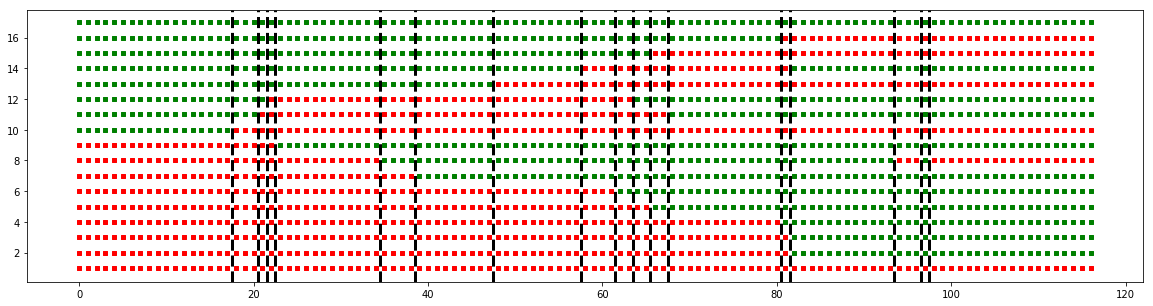

(117, 192, 5, 2)
['BarcodeFi5_01--Ri7_11_Cluster4_Phase1_NumReads214', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase1_NumReads144']


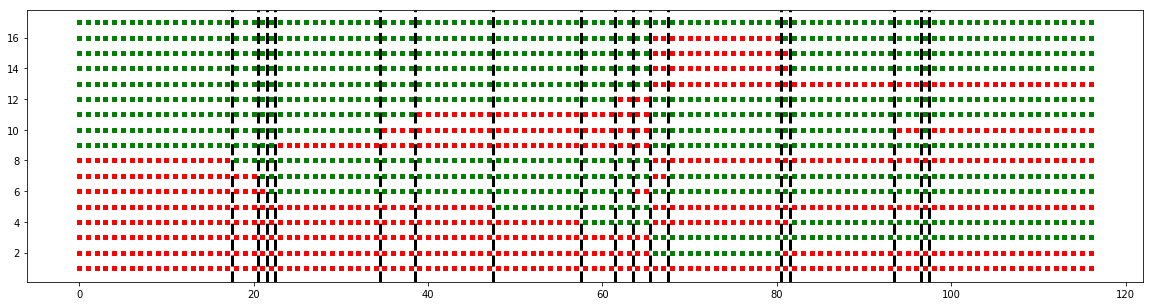

(117, 181, 5, 2)
['BarcodeFi5_01--Ri7_11_Cluster4_Phase3_NumReads176', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase4_NumReads162']


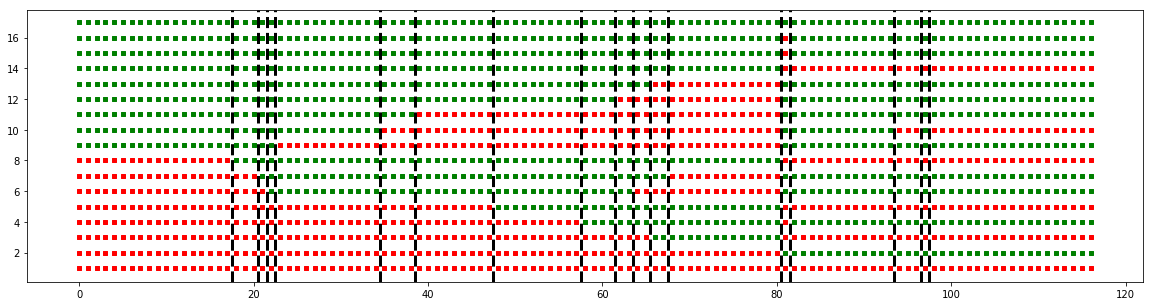

(112, 159, 5, 3)
['BarcodeFi5_01--Ri7_11_Cluster3_Phase3_NumReads217', 'BarcodeFi5_01--Ri7_11_Cluster1_Phase3_NumReads60']


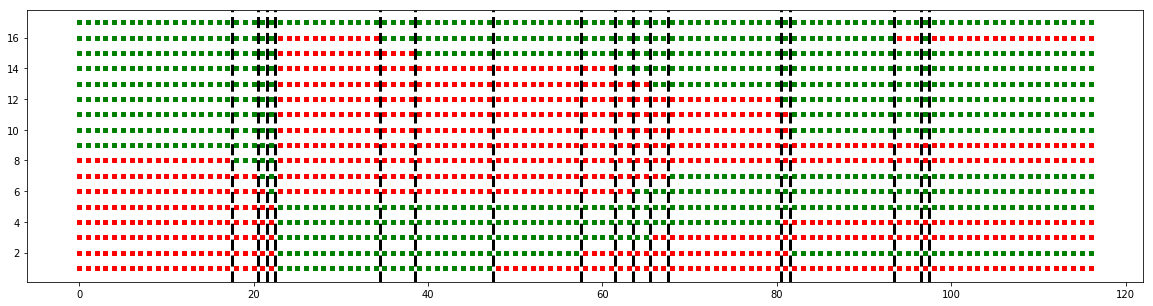

(108, 188, 5, 3)
['BarcodeFi5_01--Ri7_11_Cluster3_Phase1_NumReads218', 'BarcodeFi5_01--Ri7_11_Cluster2_Phase2_NumReads120']


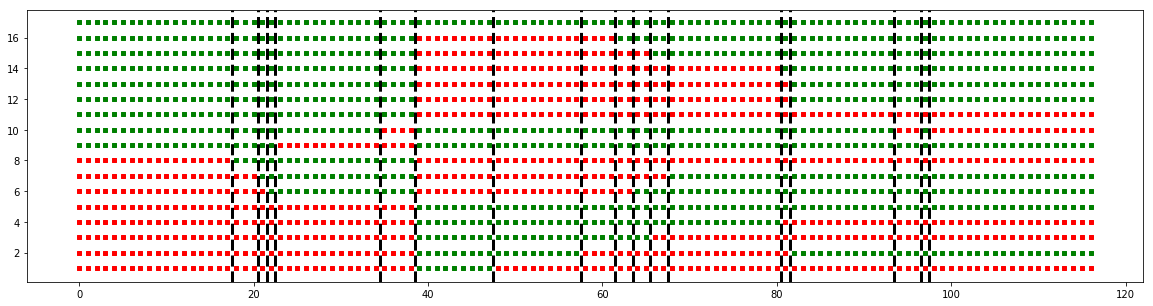

In [18]:
bc = "Fi5_01--Ri7_11"

sequences = []
names = []
for i, n in enumerate(all_names):
    if bc in n:
        sequences.append(all_sequences[i])
        names.append(n)

aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=10)

permutations = ChimFilter.rank_permutations_optimum(aln)

for i, p in enumerate(permutations[0]):
    print(permutations[1][i])
    print(permutations[2][i])
    ChimFilter.plot_chimeras(p, h=5, s=10)

In [69]:
bc = "Fi5_02--Ri7_05"

sequences = []
names = []
for i, n in enumerate(all_names):
    if bc in n:
        sequences.append(all_sequences[i])
        names.append(n)

aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=10)
if aln:
    permutations = ChimFilter.rank_permutations_optimum(aln)
    for i, p in enumerate(permutations[0]):
        print(permutations[1][i])
        print(permutations[2][i])
        ChimFilter.plot_chimeras(p, h=5, s=10)
else:
    print("Alignment gapped at all positions")

Alignment gapped at all positions


Best permutation for all samples:

---------------------------------------------------------------------
Fi5_01--Ri7_01
Best distance is also best coverage
Maximum distance: 147
Summed parental coverage: 423
Maximum number of breakpoints: 4
Number of double breaks: 3
First parent: BarcodeFi5_01--Ri7_01_Cluster0_Phase0_NumReads498
Second parent: BarcodeFi5_01--Ri7_01_Cluster1_Phase1_NumReads340


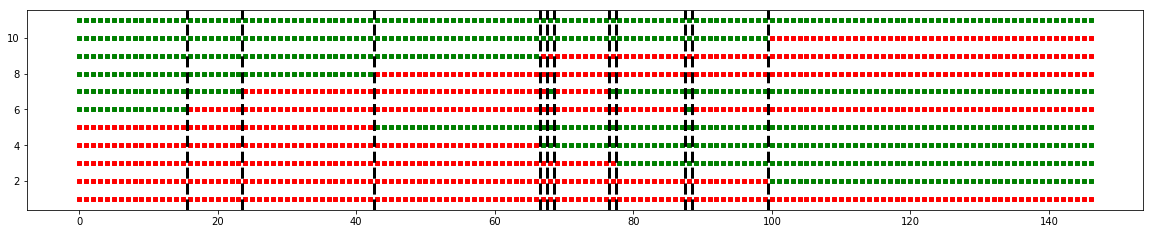

---------------------------------------------------------------------
Fi5_01--Ri7_02
Best distance is also best coverage
Maximum distance: 162
Summed parental coverage: 680
Maximum number of breakpoints: 6
Number of double breaks: 3
First parent: BarcodeFi5_01--Ri7_02_Cluster0_Phase0_NumReads499
Second parent: BarcodeFi5_01--Ri7_02_Cluster1_Phase1_NumReads415


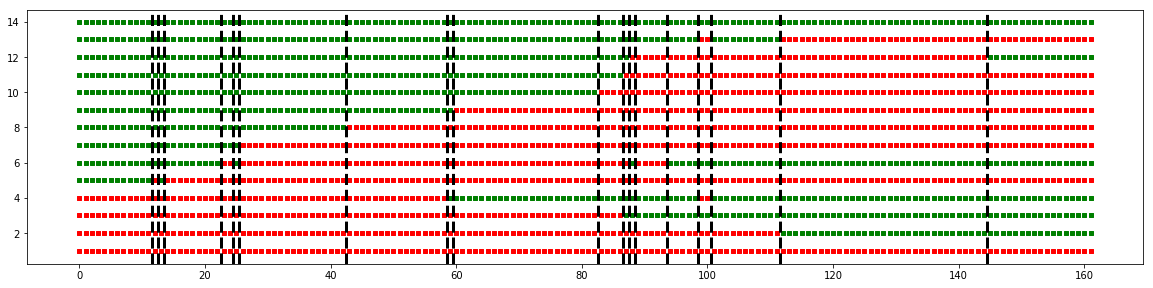

---------------------------------------------------------------------
Fi5_01--Ri7_03
Best distance is also best coverage
Maximum distance: 80
Summed parental coverage: 510
Maximum number of breakpoints: 24
Number of double breaks: 2
First parent: BarcodeFi5_01--Ri7_03_Cluster1_Phase4_NumReads224
Second parent: BarcodeFi5_01--Ri7_03_Cluster0_Phase0_NumReads497


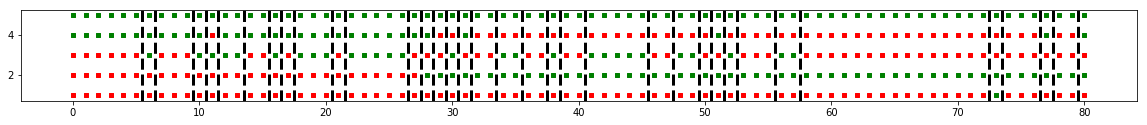

---------------------------------------------------------------------
Fi5_01--Ri7_04
Not enough sequences

---------------------------------------------------------------------
Fi5_01--Ri7_05
Best distance is also best coverage
Maximum distance: 138
Summed parental coverage: 625
Maximum number of breakpoints: 1
Number of double breaks: 1
First parent: BarcodeFi5_01--Ri7_05_Cluster0_Phase0_NumReads495
Second parent: BarcodeFi5_01--Ri7_05_Cluster1_Phase1_NumReads412


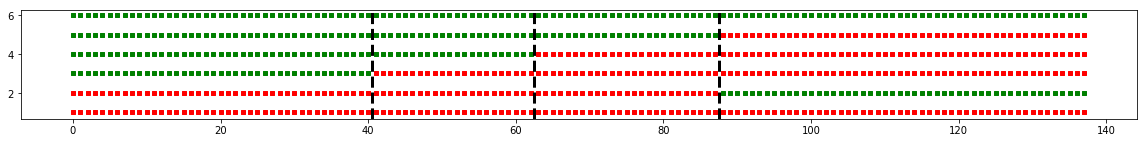

---------------------------------------------------------------------
Fi5_01--Ri7_06
Not enough sequences

---------------------------------------------------------------------
Fi5_01--Ri7_07
Maximum distance: 142
Summed parental coverage: 185
Maximum number of breakpoints: 63
Number of double breaks: 2
First parent: BarcodeFi5_01--Ri7_07_Cluster2_Phase5_NumReads256
Second parent: BarcodeFi5_01--Ri7_07_Cluster1_Phase0_NumReads497


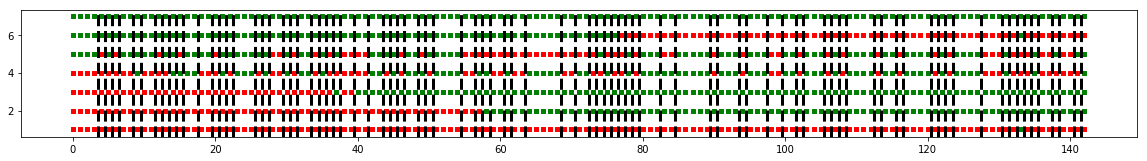

---------------------------------------------------------------------
Fi5_01--Ri7_08
Best distance is also best coverage
Maximum distance: 146
Summed parental coverage: 434
Maximum number of breakpoints: 63
Number of double breaks: 3
First parent: BarcodeFi5_01--Ri7_08_Cluster1_Phase3_NumReads262
Second parent: BarcodeFi5_01--Ri7_08_Cluster0_Phase0_NumReads494


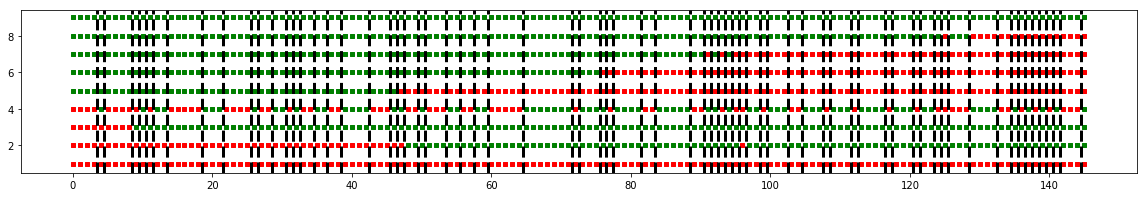

---------------------------------------------------------------------
Fi5_01--Ri7_09
Best distance is also best coverage
Maximum distance: 117
Summed parental coverage: 528
Maximum number of breakpoints: 1
Number of double breaks: 1
First parent: BarcodeFi5_01--Ri7_09_Cluster0_Phase0_NumReads499
Second parent: BarcodeFi5_01--Ri7_09_Cluster1_Phase1_NumReads281


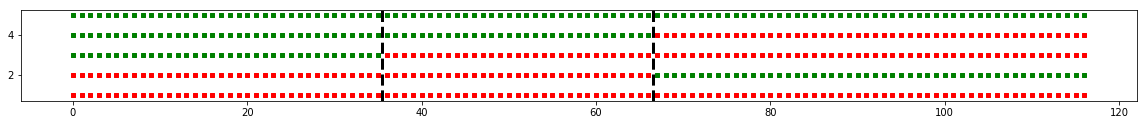

---------------------------------------------------------------------
Fi5_01--Ri7_11
Best distance is also best coverage
Maximum distance: 117
Summed parental coverage: 460
Maximum number of breakpoints: 4
Number of double breaks: 2
First parent: BarcodeFi5_01--Ri7_11_Cluster0_Phase0_NumReads496
Second parent: BarcodeFi5_01--Ri7_11_Cluster1_Phase1_NumReads392


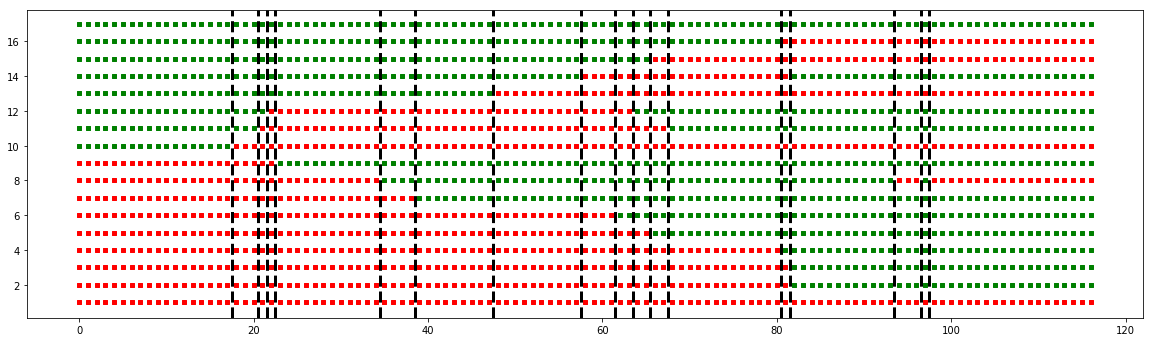

---------------------------------------------------------------------
Fi5_01--Ri7_12
Not enough sequences

---------------------------------------------------------------------
Fi5_02--Ri7_01
Not enough sequences

---------------------------------------------------------------------
Fi5_02--Ri7_02
Best distance is also best coverage
Maximum distance: 109
Summed parental coverage: 250
Maximum number of breakpoints: 60
Number of double breaks: 14
First parent: BarcodeFi5_02--Ri7_02_Cluster1_Phase3_NumReads390
Second parent: BarcodeFi5_02--Ri7_02_Cluster0_Phase1_NumReads415


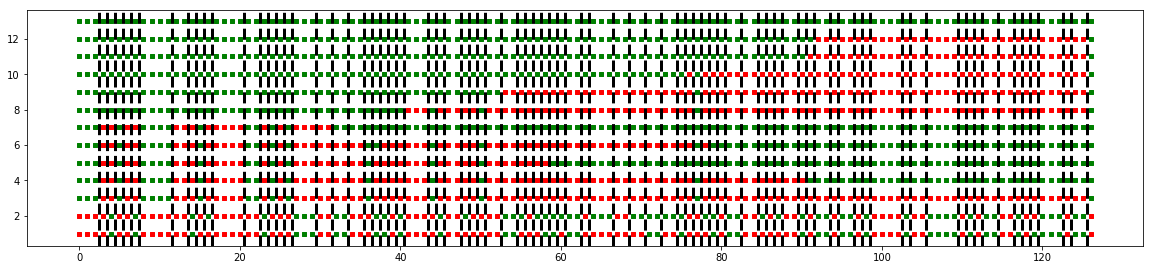

---------------------------------------------------------------------
Fi5_02--Ri7_03
Not enough sequences

---------------------------------------------------------------------
Fi5_02--Ri7_04
Best distance is also best coverage
Maximum distance: 147
Summed parental coverage: 487
Maximum number of breakpoints: 3
Number of double breaks: 1
First parent: BarcodeFi5_02--Ri7_04_Cluster0_Phase0_NumReads496
Second parent: BarcodeFi5_02--Ri7_04_Cluster1_Phase1_NumReads268


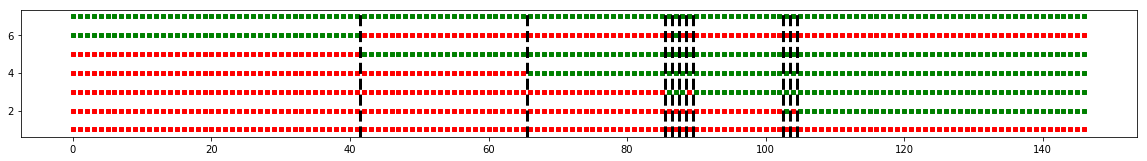

---------------------------------------------------------------------
Fi5_02--Ri7_05
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_02--Ri7_06
Best distance is also best coverage
Maximum distance: 91
Summed parental coverage: 266
Maximum number of breakpoints: 32
Number of double breaks: 1
First parent: BarcodeFi5_02--Ri7_06_Cluster1_Phase0_NumReads499
Second parent: BarcodeFi5_02--Ri7_06_Cluster2_Phase2_NumReads58


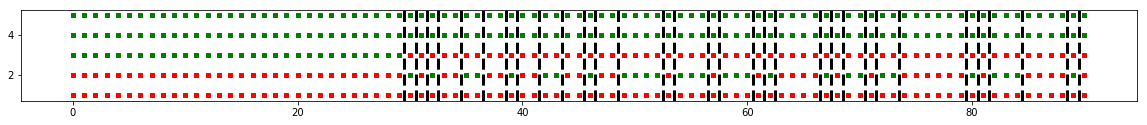

---------------------------------------------------------------------
Fi5_02--Ri7_07
Best distance is also best coverage
Maximum distance: 136
Summed parental coverage: 647
Maximum number of breakpoints: 5
Number of double breaks: 1
First parent: BarcodeFi5_02--Ri7_07_Cluster1_Phase1_NumReads390
Second parent: BarcodeFi5_02--Ri7_07_Cluster0_Phase0_NumReads496


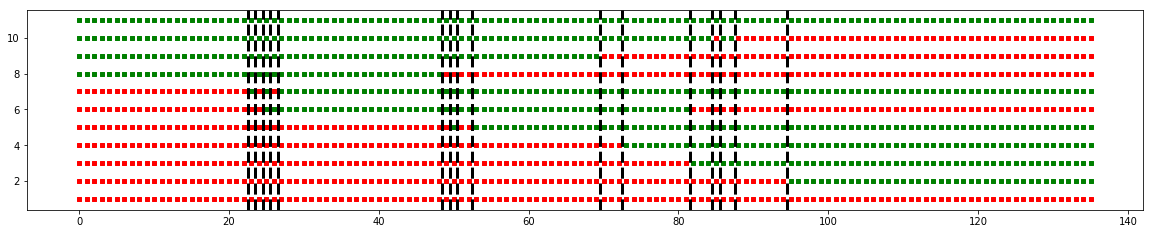

---------------------------------------------------------------------
Fi5_02--Ri7_08
Best distance is also best coverage
Maximum distance: 163
Summed parental coverage: 675
Maximum number of breakpoints: 5
Number of double breaks: 3
First parent: BarcodeFi5_02--Ri7_08_Cluster1_Phase1_NumReads439
Second parent: BarcodeFi5_02--Ri7_08_Cluster0_Phase1_NumReads451


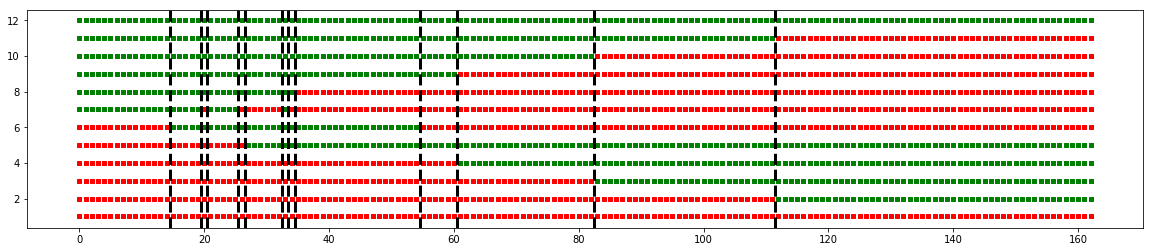

---------------------------------------------------------------------
Fi5_02--Ri7_09
Best distance is also best coverage
Maximum distance: 155
Summed parental coverage: 393
Maximum number of breakpoints: 5
Number of double breaks: 2
First parent: BarcodeFi5_02--Ri7_09_Cluster1_Phase1_NumReads424
Second parent: BarcodeFi5_02--Ri7_09_Cluster0_Phase0_NumReads498


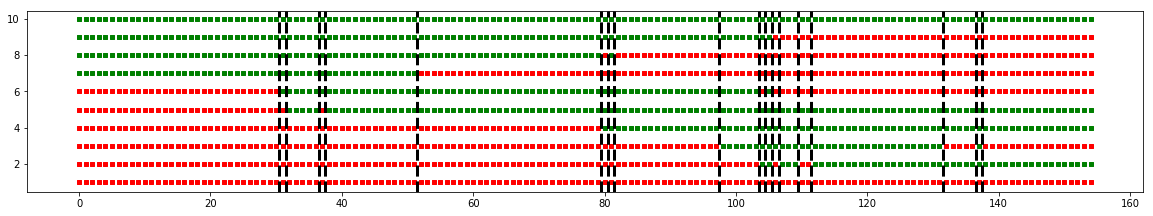

---------------------------------------------------------------------
Fi5_02--Ri7_10
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_02--Ri7_11
Best distance is also best coverage
Maximum distance: 156
Summed parental coverage: 579
Maximum number of breakpoints: 7
Number of double breaks: 1
First parent: BarcodeFi5_02--Ri7_11_Cluster1_Phase1_NumReads405
Second parent: BarcodeFi5_02--Ri7_11_Cluster0_Phase0_NumReads499


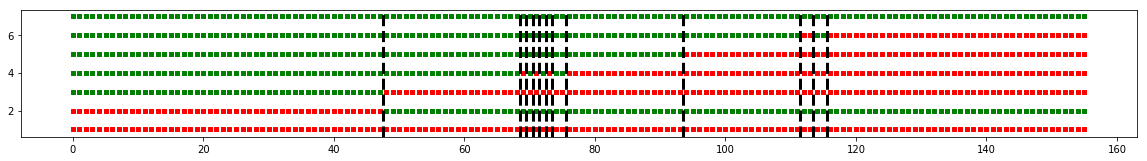

---------------------------------------------------------------------
Fi5_02--Ri7_12
Best distance is also best coverage
Maximum distance: 115
Summed parental coverage: 455
Maximum number of breakpoints: 51
Number of double breaks: 2
First parent: BarcodeFi5_02--Ri7_12_Cluster0_Phase1_NumReads444
Second parent: BarcodeFi5_02--Ri7_12_Cluster1_Phase3_NumReads382


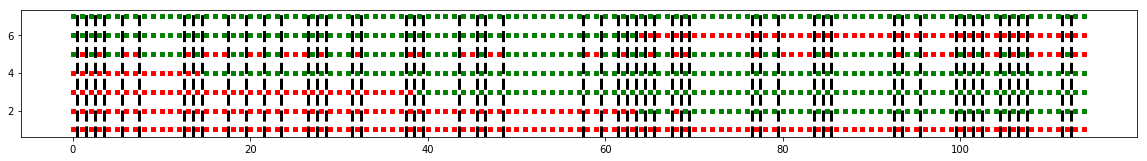

---------------------------------------------------------------------
Fi5_03--Ri7_01
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_03--Ri7_02
Maximum distance: 85
Summed parental coverage: 47
Maximum number of breakpoints: 37
Number of double breaks: 11
First parent: BarcodeFi5_03--Ri7_02_Cluster1_Phase3_NumReads183
Second parent: BarcodeFi5_03--Ri7_02_Cluster2_Phase2_NumReads27


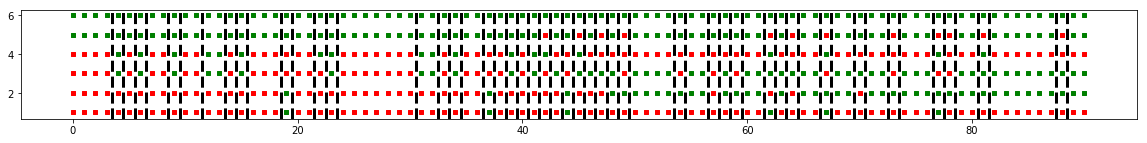

---------------------------------------------------------------------
Fi5_03--Ri7_03
Not enough sequences

---------------------------------------------------------------------
Fi5_03--Ri7_04
Not enough sequences

---------------------------------------------------------------------
Fi5_03--Ri7_05
Best distance is also best coverage
Maximum distance: 137
Summed parental coverage: 678
Maximum number of breakpoints: 4
Number of double breaks: 3
First parent: BarcodeFi5_03--Ri7_05_Cluster2_Phase1_NumReads330
Second parent: BarcodeFi5_03--Ri7_05_Cluster1_Phase0_NumReads497


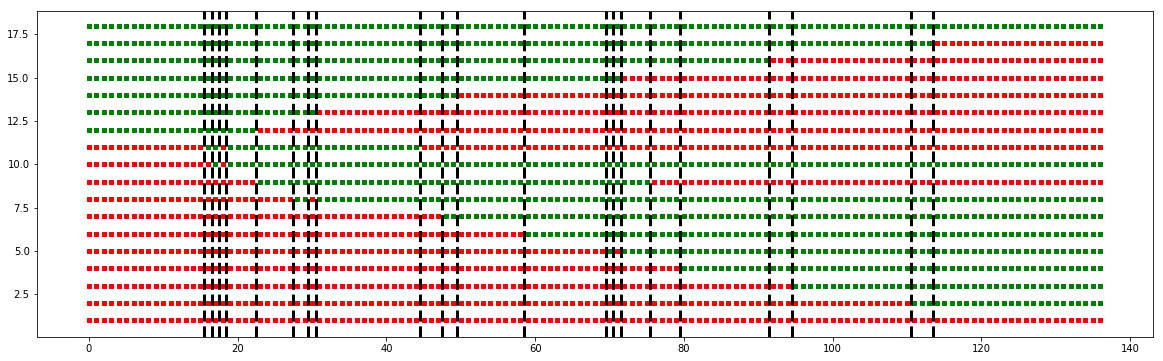

---------------------------------------------------------------------
Fi5_03--Ri7_06
Best distance is also best coverage
Maximum distance: 97
Summed parental coverage: 202
Maximum number of breakpoints: 9
Number of double breaks: 3
First parent: BarcodeFi5_03--Ri7_06_Cluster1_Phase1_NumReads444
Second parent: BarcodeFi5_03--Ri7_06_Cluster0_Phase1_NumReads446


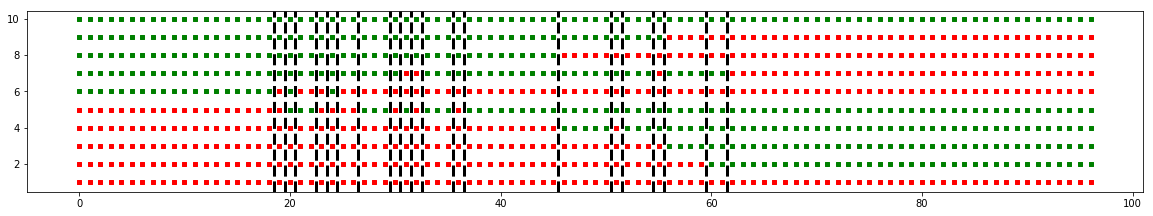

---------------------------------------------------------------------
Fi5_03--Ri7_07
Best distance is also best coverage
Maximum distance: 117
Summed parental coverage: 527
Maximum number of breakpoints: 2
Number of double breaks: 2
First parent: BarcodeFi5_03--Ri7_07_Cluster1_Phase0_NumReads499
Second parent: BarcodeFi5_03--Ri7_07_Cluster0_Phase1_NumReads430


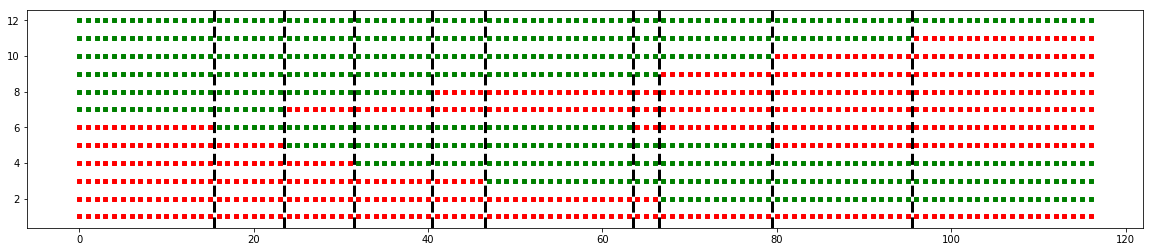

---------------------------------------------------------------------
Fi5_03--Ri7_08
Not enough sequences

---------------------------------------------------------------------
Fi5_03--Ri7_09
Best distance is also best coverage
Maximum distance: 129
Summed parental coverage: 583
Maximum number of breakpoints: 1
Number of double breaks: 1
First parent: BarcodeFi5_03--Ri7_09_Cluster0_Phase0_NumReads499
Second parent: BarcodeFi5_03--Ri7_09_Cluster1_Phase3_NumReads266


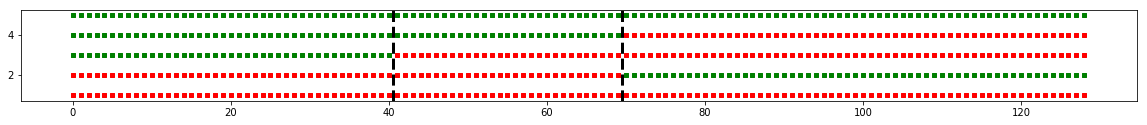

---------------------------------------------------------------------
Fi5_03--Ri7_10
Not enough sequences

---------------------------------------------------------------------
Fi5_03--Ri7_11
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_03--Ri7_12
Best distance is also best coverage
Maximum distance: 104
Summed parental coverage: 564
Maximum number of breakpoints: 1
Number of double breaks: 1
First parent: BarcodeFi5_03--Ri7_12_Cluster1_Phase3_NumReads217
Second parent: BarcodeFi5_03--Ri7_12_Cluster0_Phase0_NumReads498


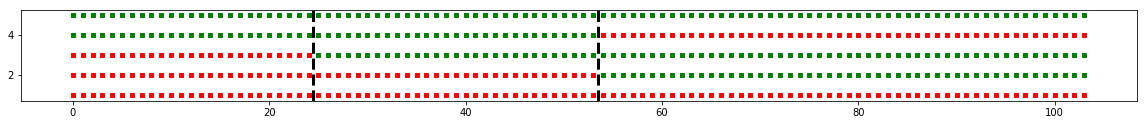

---------------------------------------------------------------------
Fi5_04--Ri7_01
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_04--Ri7_02
Best distance is also best coverage
Maximum distance: 151
Summed parental coverage: 575
Maximum number of breakpoints: 5
Number of double breaks: 0
First parent: BarcodeFi5_04--Ri7_02_Cluster0_Phase0_NumReads498
Second parent: BarcodeFi5_04--Ri7_02_Cluster1_Phase1_NumReads317


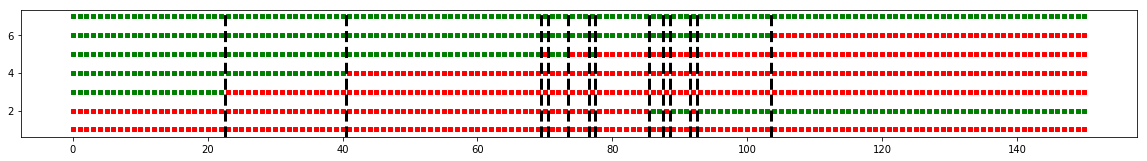

---------------------------------------------------------------------
Fi5_04--Ri7_03
Maximum distance: 143
Summed parental coverage: 516
Maximum number of breakpoints: 97
Number of double breaks: 41
First parent: BarcodeFi5_04--Ri7_03_Cluster5_Phase2_NumReads63
Second parent: BarcodeFi5_04--Ri7_03_Cluster3_Phase0_NumReads499


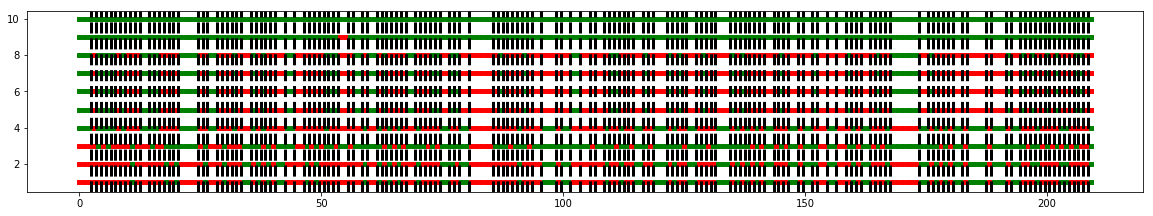

---------------------------------------------------------------------
Fi5_04--Ri7_04
Best distance is also best coverage
Maximum distance: 132
Summed parental coverage: 669
Maximum number of breakpoints: 73
Number of double breaks: 4
First parent: BarcodeFi5_04--Ri7_04_Cluster1_Phase1_NumReads348
Second parent: BarcodeFi5_04--Ri7_04_Cluster0_Phase0_NumReads496


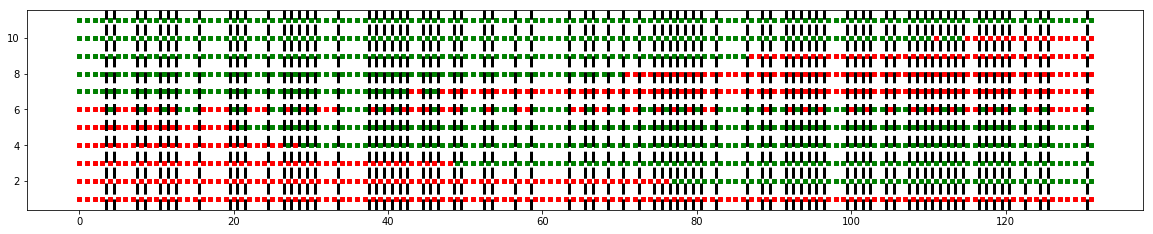

---------------------------------------------------------------------
Fi5_04--Ri7_05
Best distance is also best coverage
Maximum distance: 117
Summed parental coverage: 570
Maximum number of breakpoints: 3
Number of double breaks: 1
First parent: BarcodeFi5_04--Ri7_05_Cluster0_Phase1_NumReads396
Second parent: BarcodeFi5_04--Ri7_05_Cluster1_Phase1_NumReads435


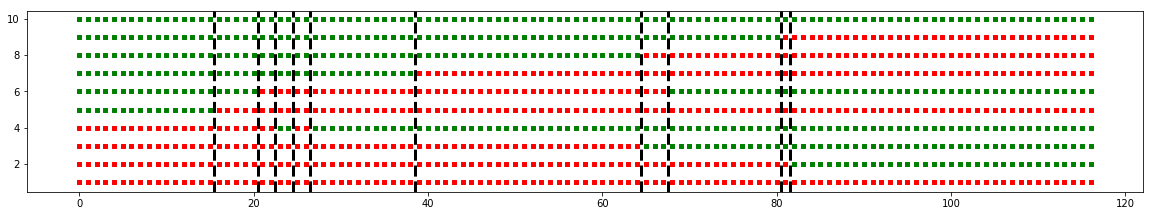

---------------------------------------------------------------------
Fi5_04--Ri7_06
Maximum distance: 82
Summed parental coverage: 20
Maximum number of breakpoints: 24
Number of double breaks: 7
First parent: BarcodeFi5_04--Ri7_06_Cluster2_Phase1_NumReads56
Second parent: BarcodeFi5_04--Ri7_06_Cluster3_Phase0_NumReads64


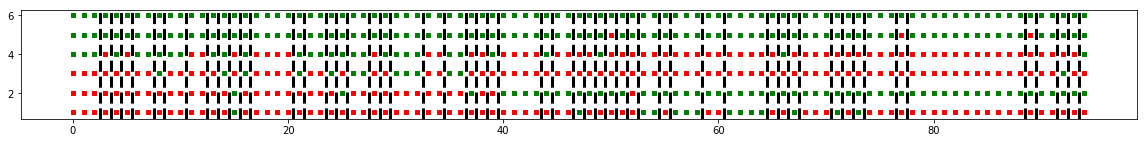

---------------------------------------------------------------------
Fi5_04--Ri7_07
Maximum distance: 129
Summed parental coverage: 222
Maximum number of breakpoints: 98
Number of double breaks: 58
First parent: BarcodeFi5_04--Ri7_07_Cluster1_Phase1_NumReads225
Second parent: BarcodeFi5_04--Ri7_07_Cluster3_Phase4_NumReads22


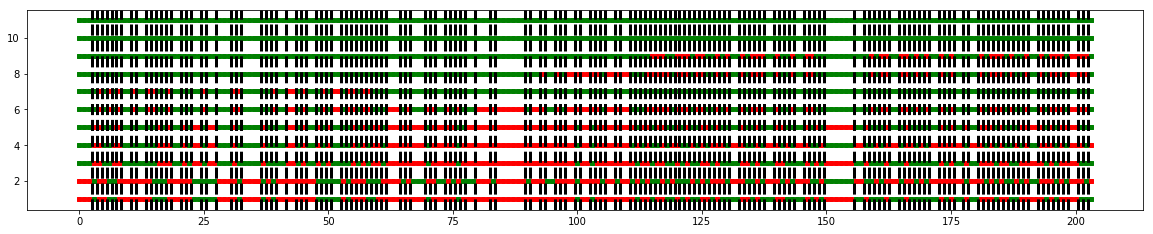

---------------------------------------------------------------------
Fi5_04--Ri7_08
Best distance is also best coverage
Maximum distance: 107
Summed parental coverage: 61
Maximum number of breakpoints: 29
Number of double breaks: 1
First parent: BarcodeFi5_04--Ri7_08_Cluster0_Phase0_NumReads263
Second parent: BarcodeFi5_04--Ri7_08_Cluster2_Phase2_NumReads22


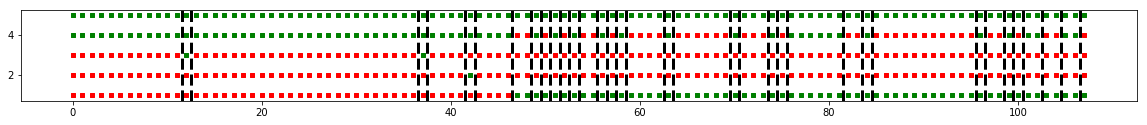

---------------------------------------------------------------------
Fi5_04--Ri7_09
Maximum distance: 112
Summed parental coverage: 7
Maximum number of breakpoints: 44
Number of double breaks: 11
First parent: BarcodeFi5_04--Ri7_09_Cluster0_Phase1_NumReads34
Second parent: BarcodeFi5_04--Ri7_09_Cluster1_Phase2_NumReads21


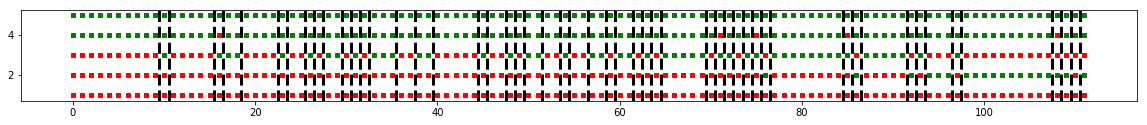

---------------------------------------------------------------------
Fi5_04--Ri7_10
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_04--Ri7_11
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_04--Ri7_12
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_06--Ri7_01
Not enough sequences

---------------------------------------------------------------------
Fi5_06--Ri7_02
Not enough sequences

---------------------------------------------------------------------
Fi5_06--Ri7_03
Best distance is also best coverage
Maximum distance: 95
Summed parental coverage: 52
Maximum number of breakpoints: 25
Number of double breaks: 1
First parent: BarcodeFi5_06--Ri7_03_Cluster0_Phase1_NumReads223
Second parent: BarcodeFi5_06--Ri7_03_Cluster1_Phase0_NumReads253


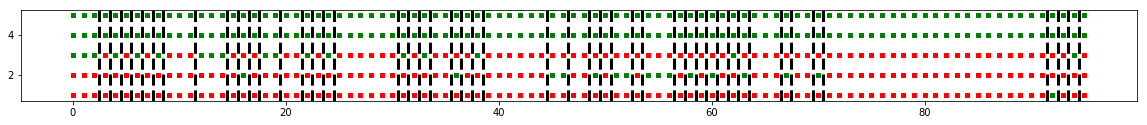

---------------------------------------------------------------------
Fi5_06--Ri7_04
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_06--Ri7_05
Not enough sequences

---------------------------------------------------------------------
Fi5_06--Ri7_06
Best distance is also best coverage
Maximum distance: 151
Summed parental coverage: 560
Maximum number of breakpoints: 5
Number of double breaks: 0
First parent: BarcodeFi5_06--Ri7_06_Cluster0_Phase0_NumReads499
Second parent: BarcodeFi5_06--Ri7_06_Cluster1_Phase1_NumReads325


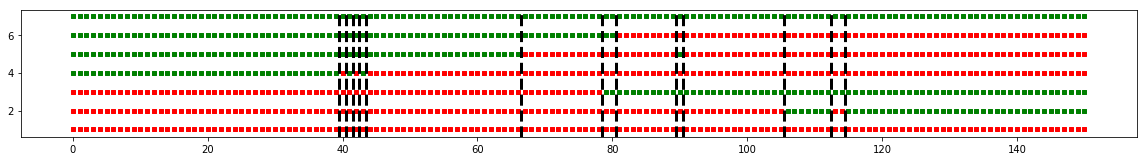

---------------------------------------------------------------------
Fi5_06--Ri7_07
Best distance is also best coverage
Maximum distance: 158
Summed parental coverage: 555
Maximum number of breakpoints: 5
Number of double breaks: 0
First parent: BarcodeFi5_06--Ri7_07_Cluster1_Phase1_NumReads326
Second parent: BarcodeFi5_06--Ri7_07_Cluster0_Phase0_NumReads496


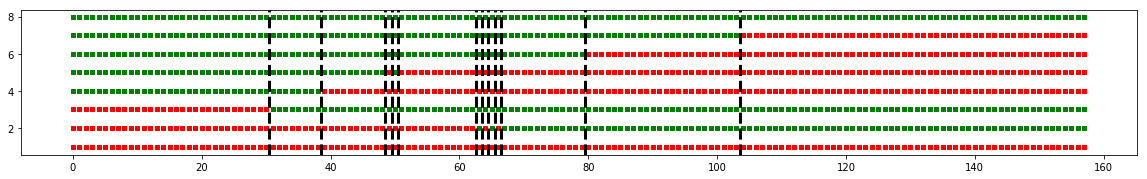

---------------------------------------------------------------------
Fi5_06--Ri7_08
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_06--Ri7_09
Best distance is also best coverage
Maximum distance: 157
Summed parental coverage: 414
Maximum number of breakpoints: 2
Number of double breaks: 0
First parent: BarcodeFi5_06--Ri7_09_Cluster1_Phase1_NumReads235
Second parent: BarcodeFi5_06--Ri7_09_Cluster0_Phase1_NumReads301


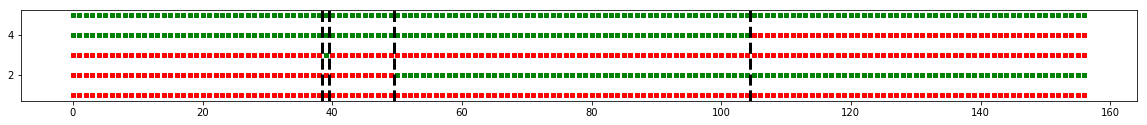

---------------------------------------------------------------------
Fi5_06--Ri7_10
Alignment gapped at all positions

---------------------------------------------------------------------
Fi5_06--Ri7_11
Not enough sequences

---------------------------------------------------------------------
Fi5_06--Ri7_12
Best distance is also best coverage
Maximum distance: 113
Summed parental coverage: 249
Maximum number of breakpoints: 3
Number of double breaks: 3
First parent: BarcodeFi5_06--Ri7_12_Cluster0_Phase0_NumReads500
Second parent: BarcodeFi5_06--Ri7_12_Cluster1_Phase1_NumReads452


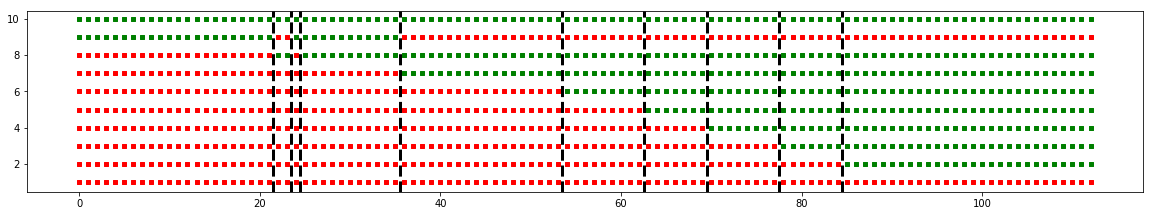

In [78]:
for bc in barcodes[:]:
    print("---------------------------------------------------------------------")
    print(bc)
    
    sequences = []
    names = []
    for i, n in enumerate(all_names):
        if bc in n:
            sequences.append(all_sequences[i])
            names.append(n)
    if len(sequences) > 2:
        aln = ChimFilter.code_alignment(sequences, names, trueCov, minCov=1)
        if aln:
            permutations = ChimFilter.rank_permutations_optimum(aln)
            stats =  "Maximum distance: %s\nSummed parental coverage: %s\nMaximum number of breakpoints: %s\nNumber of double breaks: %s" % permutations[1][0]
            parents = "First parent: %s\nSecond parent: %s" % (permutations[2][0][0], permutations[2][0][1])
            print(stats)
            print(parents)
            ChimFilter.plot_chimeras(permutations[0][0], h=len(permutations[0][0])/3, s=10)
        else:
            print("Alignment gapped at all positions\n")
    else:
        print("Not enough sequences\n")

We need to test whether a 2-parent model is adequate, or whether there is more likely only one allele. In case of a homozygote, we expect (1) the lack of a perfect chimera model and (2) a departure from the expectation on coverage distribution. The latter should be a better sign.

Roughly, in all cases, the true parents should be in excess compared to chimeras. Chimeras should be distributed without clear departure from the neutral "uniform-probability in an exponential population" model. A coverage-based signs would be (1) highly asymmetric coverage of the two inferred parents and (2) the second parent's coverage is better explained as a part of the neutral coverage distribution than as an outlier.

The probability distribution for coverage simplifies very well if we assume a simple model. We call $S$ the number of copies of one parent sequences, $K$ the total number of PCR cycles, $C$ the current cycle, and $p$ the instantaneous, constant probability for each sequence to convert into a chimera. We assume chimera conversion happens without loss, so that the final number of sequences after $K$ cycles is always $2S\cdot2^K$. Conversely, the number of new sequences chimeric arising at each cycle $C$ is $p\cdot2S\cdot2^C$, and their final number after $K$ cycles is $2^{K-C}$.

As a result, the total number of sequences, in the final pool, that arised at cycle $C$, is $(p\cdot2S\cdot2^C)\cdot(2^{K-C})$, or $p\cdot2S\cdot2^{K}$ (a constant number independant of the cycle of origin, but covering a pool of exponentially increasing diversity).

As another result, the frequency of each individual sequence in the final pool that has originated at cycle $C$ and has a coverage of $2^{K-C}$ is $(p\cdot2S\cdot2^C)/(2S\cdot2^K)$ = $p\cdot2^{C-K}$. If we pose $x = 2^{C-K}$, the function describing the probability of finding a sequence of coverage $x$ in the final pool is $f(x) = p/x$ (scaled down to a total number of sequences of 1). Alternatively, if we observe a total number of sequences $N$, we expect to observe $(N\cdot p)/x$ sequences at a coverage $x$.

Here, $p$ is unknown. We can compare 3 models: one where only one sequences is truely parental (homozygote), and hence $S$ is reflected by its coverage alone (it is not included in $N$), one under which the 2 parents are truely parental, and one in which no parental sequence exists. The model providint the best fit to $f$ with $p$ within a reasonable range should have highest support. $p$ should not vary largely between samples.

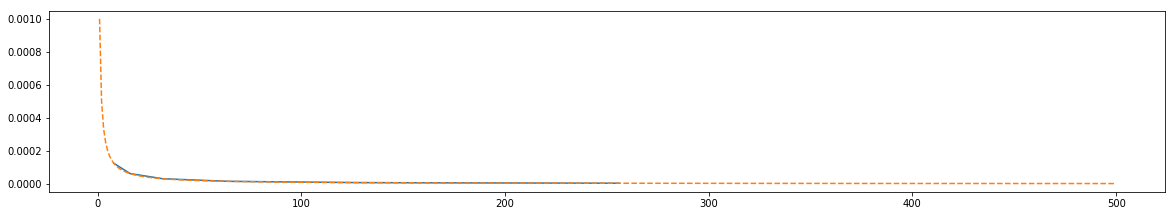

In [137]:
# Growth of a sequence through 20 PCR cycles:

S = 1000 # starting molarity for a parental allele
K = 20 # total number of cycles
# C is the index of the current cycle


# If parent sequences start at equimolarity, they end up with:
parental = [2*S*2**k for k in range(1, K+1)]

# A Chimeric sequence arising at cycle C (zero-based) will end up with a population of 2**(nCycles - (C+1)).
# If the probability pC of a chimera arising is constant, the number of new chimeras 
# at each cycle is given approximately by:
pC = .001
nNew = [pC*2*x for x in parental]
# And the end population of the summed chimera arising at each cycle is given by:
endPopChim = [n*2**(K - (C+1)) for C, n in enumerate(nNew)] # which interestingly means that he summed number
# of chimeras arising at each cycle in the total pool is constant, since the two exponentials compensate each other.

nCopiesC = [2**(K - (C+1)) for C in range(1, K+1)] # Number of final copies of the chimera, by cycle of origin
freqC = [x / (2*S*2**K) for x in nCopiesC]

plt.plot(nNew[:6], freqC[:6])
plt.plot([x for x in range(1, 500)], [pC/x for x in range(1, 500)], ls='--')

#plt.plot(freqC, [pC/x for x in range(1, 1000)])

#plt.plot([x for x in range(1, K+1)], parental)
#plt.xticks(np.arange(0, K, step=1))

plt.show()